In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
url = "https://raw.githubusercontent.com/dickoa/penguins/master/data/penguins_size.csv"
penguins = pd.read_csv(url)

In [4]:
penguins.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
female = np.mean(penguins[penguins['sex'] == 'FEMALE']['body_mass_g'])
male = np.mean(penguins[penguins['sex'] == 'MALE']['body_mass_g'])
point_estimate = male - female
point_estimate

np.float64(683.4117965367964)

In [19]:
#n = len(penguins)
n = penguins.shape[0]

100%|██████████| 10000/10000 [00:17<00:00, 556.57it/s]


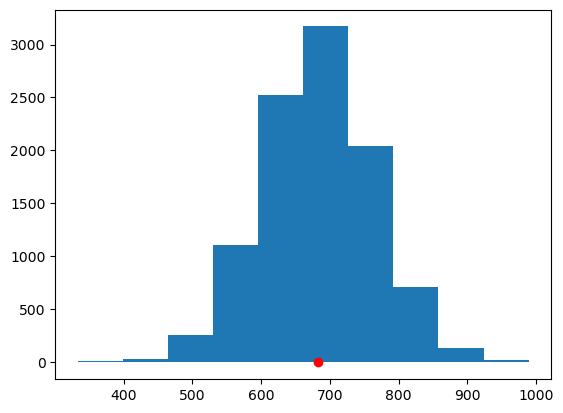

In [34]:
boot_stats = []
for i in tqdm(range(10_000)):
    penguin_boot = penguins.sample(n, replace=True)
    stat = np.mean(penguin_boot[penguin_boot['sex'] == 'MALE']['body_mass_g'])-np.mean(penguin_boot[penguin_boot['sex'] == 'FEMALE']['body_mass_g'])
    boot_stats.append(stat)
boot_stats = np.array(boot_stats)
plt.hist(boot_stats)
plt.scatter(point_estimate, -5, color='red')

(array([   6.,   27.,  255., 1104., 2528., 3171., 2044.,  709.,  136.,
          20.]),
 array([-350.14288629, -284.55801261, -218.97313893, -153.38826525,
         -87.80339157,  -22.21851788,   43.3663558 ,  108.95122948,
         174.53610316,  240.12097684,  305.70585052]),
 <BarContainer object of 10 artists>)

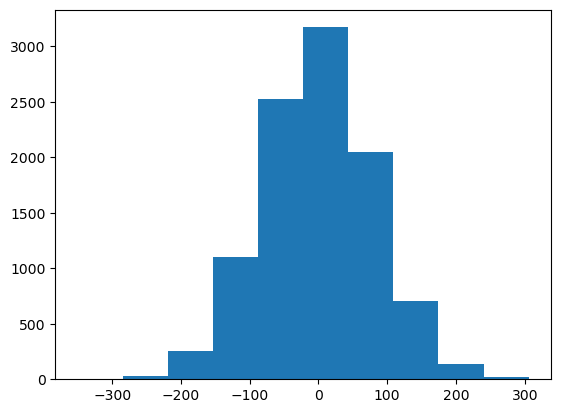

In [36]:
plt.hist(boot_stats-point_estimate)

In [46]:
low = np.percentile(boot_stats, 2.5)
up = np.percentile(boot_stats, 100-2.5)
low

np.float64(525.8916832070255)

In [47]:
up

np.float64(841.9796743459316)

In [40]:
l = np.percentile(boot_stats-point_estimate, 2.5)
u = np.percentile(boot_stats-point_estimate, 100-2.5)

In [41]:
lower_bound = point_estimate - u
upper_bound =point_estimate - l

In [42]:
lower_bound

np.float64(524.8439187276612)

In [43]:
upper_bound

np.float64(840.9319098665673)